# **Get the Class Names which are selected**

I chose a subset of 100 classes from the original dataset

In [1]:
!wget 'https://raw.githubusercontent.com/MadhavGali/FindTheArt/master/subsetClasses.txt'

--2019-01-02 20:52:12--  https://raw.githubusercontent.com/MadhavGali/FindTheArt/master/subsetClasses.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 759 [text/plain]
Saving to: ‘subsetClasses.txt’

subsetClasses.txt   100%[===================>]     759  --.-KB/s    in 0s      

2019-01-02 20:52:12 (66.6 MB/s) - ‘subsetClasses.txt’ saved [759/759]



Read the class names

In [2]:
f = open("subsetClasses.txt","r")
# And for reading use
classes = f.readlines()
print(classes)
f.close()

['drums\n', 'sun\n', 'laptop\n', 'anvil\n', 'baseball_bat\n', 'ladder\n', 'eyeglasses\n', 'grapes\n', 'book\n', 'dumbbell\n', 'traffic_light\n', 'wristwatch\n', 'wheel\n', 'shovel\n', 'bread\n', 'table\n', 'tennis_racquet\n', 'cloud\n', 'chair\n', 'headphones\n', 'face\n', 'eye\n', 'airplane\n', 'snake\n', 'lollipop\n', 'power_outlet\n', 'pants\n', 'mushroom\n', 'star\n', 'sword\n', 'clock\n', 'hot_dog\n', 'syringe\n', 'stop_sign\n', 'mountain\n', 'smiley_face\n', 'apple\n', 'bed\n', 'shorts\n', 'broom\n', 'diving_board\n', 'flower\n', 'spider\n', 'cell_phone\n', 'car\n', 'camera\n', 'tree\n', 'square\n', 'moon\n', 'radio\n', 'hat\n', 'pizza\n', 'axe\n', 'door\n', 'tent\n', 'umbrella\n', 'line\n', 'cup\n', 'fan\n', 'triangle\n', 'basketball\n', 'pillow\n', 'scissors\n', 't-shirt\n', 'tooth\n', 'alarm_clock\n', 'paper_clip\n', 'spoon\n', 'microphone\n', 'candle\n', 'pencil\n', 'envelope\n', 'saw\n', 'frying_pan\n', 'screwdriver\n', 'helmet\n', 'bridge\n', 'light_bulb\n', 'ceiling_fan\n'

Replace \n and underscores  

In [0]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

Download the Dataset

In [0]:
!mkdir data

In [0]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

Importing dependencies

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

Loading the data

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 6000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [11]:
print(len(x_train))

480000



Show some random data

broom


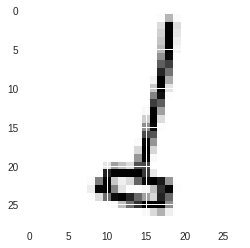

In [12]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

Preprocessing

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# **The model**

In [14]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
__________

Training

In [15]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Train on 432000 samples, validate on 48000 samples
Epoch 1/5
 - 1342s - loss: 1.5682 - top_k_categorical_accuracy: 0.8344 - val_loss: 1.1211 - val_top_k_categorical_accuracy: 0.9067
Epoch 2/5
 - 1379s - loss: 0.9894 - top_k_categorical_accuracy: 0.9190 - val_loss: 0.9376 - val_top_k_categorical_accuracy: 0.9253
Epoch 3/5
 - 1432s - loss: 0.8639 - top_k_categorical_accuracy: 0.9323 - val_loss: 0.8783 - val_top_k_categorical_accuracy: 0.9295
Epoch 4/5
 - 1373s - loss: 0.7947 - top_k_categorical_accuracy: 0.9391 - val_loss: 0.8395 - val_top_k_categorical_accuracy: 0.9344
Epoch 5/5
 - 1390s - loss: 0.7482 - top_k_categorical_accuracy: 0.9431 - val_loss: 0.7991 - val_top_k_categorical_accuracy: 0.9372


# Testing

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 93.85%


Inference

['alarm_clock', 'cloud', 'shorts', 'tooth', 'clock']


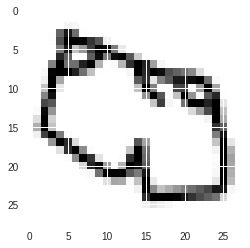

In [17]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# **Install Tensorflow.js**

In [19]:
!pip install tensorflowjs

    100% |████████████████████████████████| 61kB 5.5MB/s 
    100% |████████████████████████████████| 13.9MB 1.6MB/s 
    100% |████████████████████████████████| 307kB 21.4MB/s 
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: tensorflow-hub 0.2.0
    Uninstalling tensorflow-hub-0.2.0:
      Successfully uninstalled tensorflow-hub-0.2.0
  Found existing ins

Save and convert

In [21]:
model.save('keras.h5')

In [22]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.


In [0]:
!cp class_names.txt model/class_names.txt

In [24]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/group1-shard1of1 (deflated 7%)
  adding: model/model.json (deflated 89%)


In [0]:
from google.colab import files
files.download('model.zip')